In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xroms
#%matplotlib notebook
%matplotlib inline

In [2]:
# Initiate the Dataset
A = xroms.roms_dataset("ocean_avg_0014.nc")

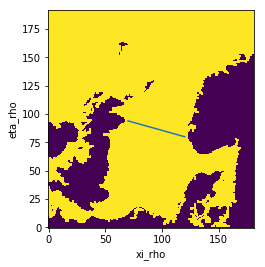

In [5]:
# Define a linear section, draw in map for control
x0, y0 = 70,  94
x1, y1 = 120, 80
Npoints = 50
X = np.linspace(x0, x1, Npoints)
Y = np.linspace(y0, y1, Npoints)

A.mask_rho.plot(add_colorbar=False)
plt.plot(X, Y)
plt.axis('image');

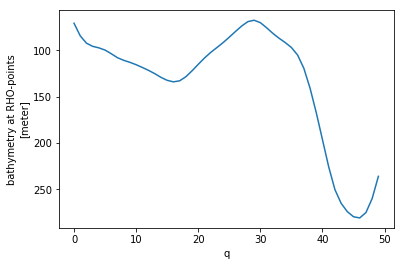

In [7]:
# Make DataArrays
Xv = xr.DataArray(X, dims=['q'], coords=dict(q=np.arange(Npoints)))
Yv = xr.DataArray(Y, dims=['q'], coords=dict(q=np.arange(Npoints)))
B = A.interp(xi_rho=Xv, eta_rho=Yv)
B
# Plot depth along section
B.h.plot(yincrease=False)
#B.h.plot(x=B.lon_rho, yincrease=False)

In [8]:
# mid points on edges
Xe = 0.5*(X[:-1] + X[1:])
Ye = 0.5*(Y[:-1] + Y[1:])
Xe = xr.DataArray(Xe, dims=['q'], coords=dict(q=np.arange(Npoints)))
Ye = xr.DataArray(Ye, dims=['q'], coords=dict(q=np.arange(Npoints)))

Bp = A.interp(xi_rho=Xv, eta_rho=Yv)
Be = A.interp(xi_rho=Xe, eta_rho=Ye)

Dx2 = (Bp.xi_rho.values[1:] - Bp.xi_rho.values[:-1])**2 / Be.pm.values**2
Dy2 = (Bp.eta_rho.values[1:] - Bp.eta_rho.values[:-1])**2 / Be.pn.values**2
D = np.sqrt(Dx2 + Dy2)

# OBS. distance = feil, regn nærmere
# Skill mellom vertices og edges
#coords = {'time': B0.time, 's_rho': B0.s_rho, 'q': B0.q, 'distance': d, 'z': B.z, 'depth': -B.z}
Be.coords['distance'] = np.cumsum(D) / 1000.0
Be.coords['depth'] = -Be.z_rho
# B['distance'].attributes = {'units': 'km'}
# B.swap_dims({'q': 'distance'})
#B['distance'].attrs = {'units': 'km', 'long_name':'Distance along section'}
#B['depth'].attrs = {'units': 'm'}
# Be.depth.swap_dims({'q': 'distance'}) Virker ikke
# Definer fullt data-array for detph.

ValueError: conflicting sizes for dimension 'q': length 49 on the data but length 50 on coordinate 'q'

In [ ]:
T = Be.temp.isel(time=3)
T.plot.contourf('q', 'z_rho', robust=True, cmap='rainbow')
# T['depth'] = -T.z
# Denne virker ikke, hverken med z eller depth
# T.plot.pcolormesh('q', 'z')
# T.plot.contourf('distance', 'depth', yincrease=False)
# T.plot.contourf('q', 'depth', yincrease=False)  # Denne virker


In [ ]:
#T = B.temp.isel(time=3)
#T.plot.contourf('q', 'z', robust=True, cmap='rainbow')
#T['depth'] = -T.z
# Denne virker ikke, hverken med z eller depth
# T.plot.pcolormesh('q', 'z')
# T.plot.contourf('q', 'depth')

In [ ]:
S = B.salt.isel(time=3)
levels = [32, 33, 34, 34.5, 34.8, 34.9, 35.0, 35.1, 35.2]
S.plot.contourf('q', 'z', levels=levels, cmap='rainbow_r')

In [ ]:
# Kan lage Dataset med relevante variable

#grid_vars = ['xi_rho', 'eta_rho', 'xi_u', 'eta_u', 'xi_v', 'eta_v', 
#             'time', 's_rho', 's_w', 'lon_rho', 'lat_rho']
# data_vars = ['']
#data_vars = ['h', 'mask_rho', 'u', 'v', 'temp', 'salt']
grid_vars = ['mask_rho', 'h', 'lon_rho', 'lat_rho', 'pm', 'pn', 's_rho', 's_w', 'time']
data_vars = ['zeta', 'u', 'v', 'temp', 'salt']
derived_vars = ['z_rho']
V = grid_vars + data_vars + derived_vars
#V = grid_vars 

G = {s:A[s] for s in V}

B = xr.Dataset(G)
B

In [ ]:
B.h
